## Prompts for locations

In [1]:
location_prompts = [
    "steampunk city with skyscrapers",
    "cyberpunk village in Japanese rustic style",
    "fantasy dungeons and dragons",
    "noir city from 1930s",
    "StarTrek inspired spaceship",
    "undeground mine of goblins",
    "SuperMario style magic land plain",
    "SuperMario style magic land beach",
]

## Generating locations 

In [2]:
from holodeck import initialize_location
from holodeck import generate_location_and_encounters
import os
from tqdm.notebook import tqdm
import traceback

import concurrent.futures
from tqdm import tqdm

def generate_location(prompt):
    location_dict, encounters_list = generate_location_and_encounters(prompt)
    if location_dict:
        try:
            location = initialize_location(location_dict, encounters_list)
            return location
        except Exception as e:
            print("Error: ", e)
            traceback.print_exc()
    else:
        print(f"GENERATING FROM '{prompt}' failed!")
        return None

locations = []
with concurrent.futures.ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    results = list(tqdm(executor.map(generate_location, location_prompts), total=len(location_prompts), desc="Generating locations"))
    locations += [r for r in results if r is not None]



locations

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Generating locations:   0%|          | 0/8 [00:00<?, ?it/s]

<
{'name': 'Goblin Mine', 'description': 'A wide open expanse of land with a jagged mountain peak in the distance. The road that cuts through the landscape terminates at a deep crevasse, revealing a long-forgotten mine entrance. Closer inspection reveals a small cluster of goblin huts huddled around the entrance.\n', 'buildings': [{'name': 'Goblin Mine', 'description': 'An old mine with goblin huts clustered around it. A single entrance provides access to the darkness inside.', 'enterable': True}, {'name': 'Goblin Huts', 'description': 'A cluster of small, ramshackle huts that the goblins use as shelter. They appear vacant on closer inspection.', 'enterable': True}], 'ways': [{'name': 'Road', 'description': 'A road leading away from the mine, back to the plains.'}]}

<
{'name': 'Magic Plains of Serene Landscapes', 'description': 'A sprawling grassland with a serene atmosphere, illuminated by the sun and a sprinkling of stars. Paths wander all around the expanse, passing by countless tr

Generating locations:  12%|█▎        | 1/8 [00:15<01:47, 15.33s/it]

<
[{'probability': 0.2, 'description': 'As you walk down the cobblestone roadway, you notice a small gear on the ground.', 'actions': [{'type': 'item', 'name': 'Small Gear', 'description': 'A small gear, likely from a clockwork device.'}], 'trigger': {'type': 'way', 'way': 'Cobblestone Roadway'}}, {'probability': 0.1, 'description': 'As you stroll past the Tower of Gears, you hear a strange clicking noise coming from inside.', 'actions': [{'type': 'character', 'name': 'Clockwork Keeper', 'description': 'A mysterious creature made of clockwork, endlessly repairing and maintaining the Tower of Gears.'}], 'trigger': {'type': 'building', 'building': 'Tower of Gears'}}, {'probability': 0.05, 'description': "As you enter the Gearsmith's Workshop, you find a small clockwork spider scuttling around the floor.", 'actions': [{'type': 'critter', 'name': 'Clockwork Spider'}]}]



Traceback (most recent call last):
  File "/tmp/ipykernel_5615/2627030779.py", line 14, in generate_location
    location = initialize_location(location_dict, encounters_list)
  File "/home/standard/Holodeck/holodeck/game_objects.py", line 172, in initialize_location
    way = Way(way_dict['name'], way_dict.get('description', ""))
KeyError: 'name'
Generating locations: 100%|██████████| 8/8 [00:15<00:00,  1.98s/it]

<
[{'probability': 0.35, 'description': 'As you walk down the Boulevard, you come across a street performer busking with some unusual instruments', 'actions': [{'type': 'character', 'name': 'The Street Performer', 'description': 'A mysterious street performer playing some strange instruments.'}], 'trigger': {'type': 'way', 'way': 'Noir City Boulevard'}}, {'probability': 0.25, 'description': 'A small group of mysterious figures lurk around the Noir City Bank.', 'actions': [{'type': 'character', 'name': 'Mysterious Figures', 'description': 'A suspicious looking group of people lurking around the bank.'}], 'trigger': {'type': 'building', 'building': 'Noir City Bank'}}, {'probability': 0.1, 'description': 'A large rat scurries across the cobblestone path.', 'actions': [{'type': 'critter', 'name': 'Large Rat', 'description': 'A large rat scurrying around the cobblestone path.'}]}]

Error:  'name'


## Generate Image Prompts

In [3]:
from holodeck.gpt_text import \
        generate_object_image_prompt, \
        generate_building_image_prompt, \
        generate_location_image_prompt

from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

locations_prompts = []
objects_image_prompts = []
buildings_image_prompts = []

def generate_location_images(location):
    return (location, generate_location_image_prompt(location))

def generate_object_images(location):
    prompts = []
    for o in location.objects:
        prompts.append((o, generate_object_image_prompt(o, location)))
    return prompts

def generate_building_images(location):
    prompts = []
    for b in location.all_buildings:
        prompts.append((b, generate_building_image_prompt(b, location)))
    return prompts

with ThreadPoolExecutor() as executor:
    location_image_futures = list(tqdm(executor.map(generate_location_images, locations), desc="Locations"))
    object_image_futures = [executor.submit(generate_object_images, location) for location in locations]
    building_image_futures = [executor.submit(generate_building_images, location) for location in locations]

    for location, prompt in location_image_futures:
        locations_prompts.append((location, prompt))
    for f in object_image_futures:
        for prompt in f.result():
            objects_image_prompts.append(prompt)
    for f in building_image_futures:
        for prompt in f.result():
            buildings_image_prompts.append(prompt)




Locations: 7it [00:02,  2.40it/s]


## Generate Images

Images:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### Steampunk City of Gears


An aerial photograph of a steampunk urban center with Tower of Gears, Gearsmith's Workshop, and Steamwork Airships Hangar during twilight with a tilt-shift lens — at 16:9. vinkpunk

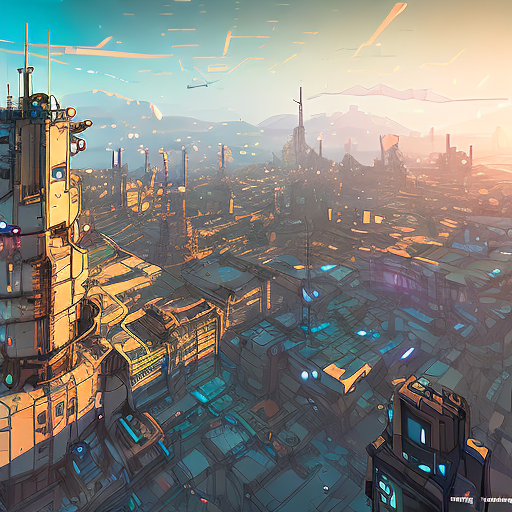

Images:  11%|█         | 1/9 [00:03<00:31,  3.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Cyberpunk Village at the Mountainside

An aerial photograph of a mountainous landscape with The Bamboo Chest and Chikara-no-Mori Shrine during sunset with a tilt-shift lens — at 16:9. vinkpunk.

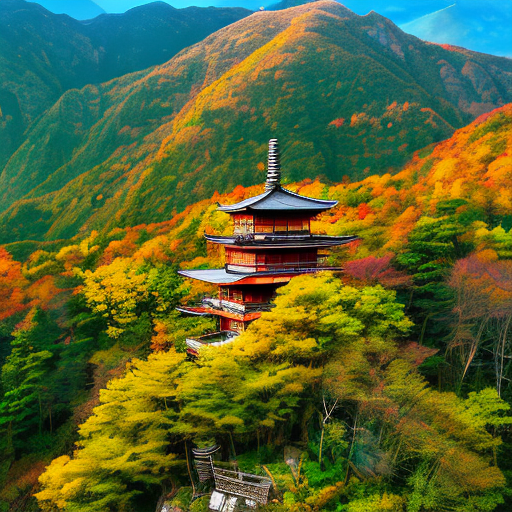

Images:  22%|██▏       | 2/9 [00:06<00:23,  3.41s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Lands of Dragons


"An aerial photograph of the Land of Dragons during sunset with a telephoto lens — at 16:9. vinkpunk"

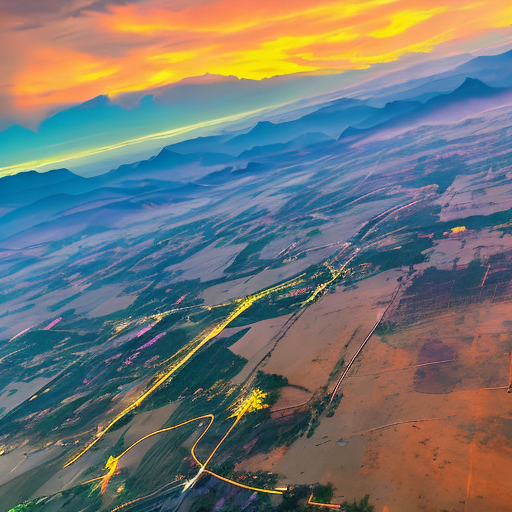

Images:  33%|███▎      | 3/9 [00:10<00:19,  3.25s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### The Starship Venture


An aerial photograph of a space vessel with its bridge, cargo bay, and engine room during dawn with natural lighting using a medium-angle lens — at 16:9. vinkpunk

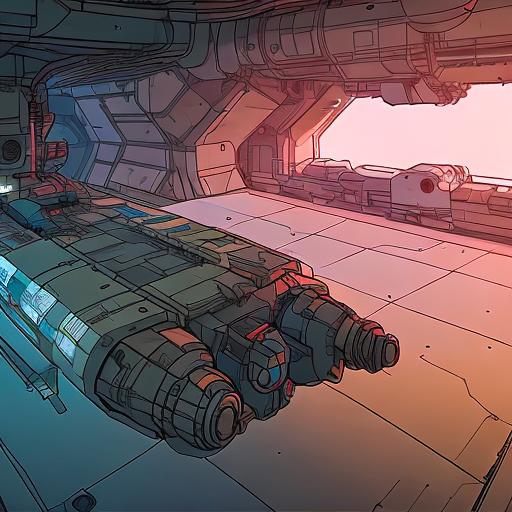

Images:  44%|████▍     | 4/9 [00:13<00:15,  3.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Goblin Mine


Prompt: An aerial photograph of a wide open expanse of land with a jagged mountain peak, a terminating road, and the Goblin Mine and huts during twilight with a wide angle lens — at 16:9. vinkpunk.

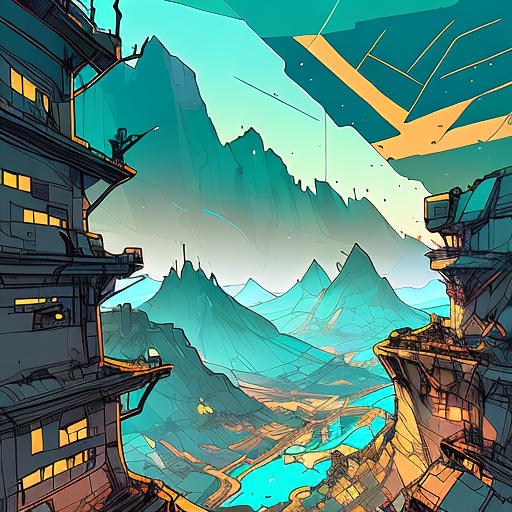

Images:  56%|█████▌    | 5/9 [00:16<00:12,  3.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Magic Plains of Serene Landscapes


An aerial photograph of a grassland with Mystical Shrine and Mysterious Blocks during twilight with telephoto lens — at 16:9. vinkpunk

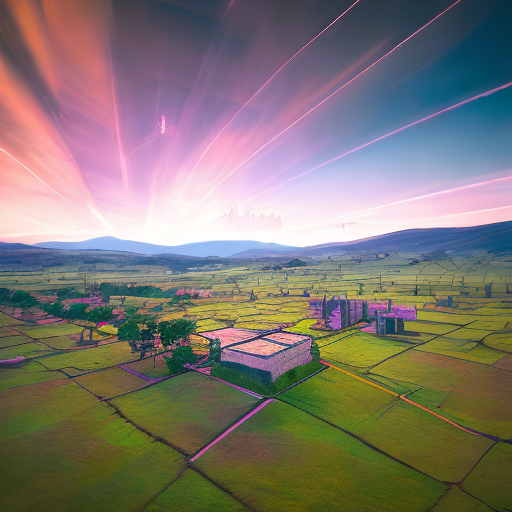

Images:  67%|██████▋   | 6/9 [00:19<00:09,  3.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Magic Land Beach

An aerial photograph of a beach with a boardwalk and magical castle during sunrise with long exposure using Leica Summilux lens — at 16:9. vinkpunk

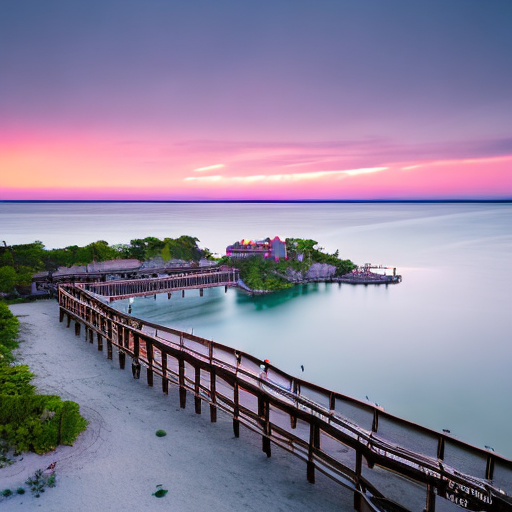

Images:  78%|███████▊  | 7/9 [00:22<00:06,  3.12s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Small Gear


The entire Small Gear is visible. Small Gear with its intricate cogs and gears on a background of buzzing and bustling urban center during day with bright sunlight. vinkpunk

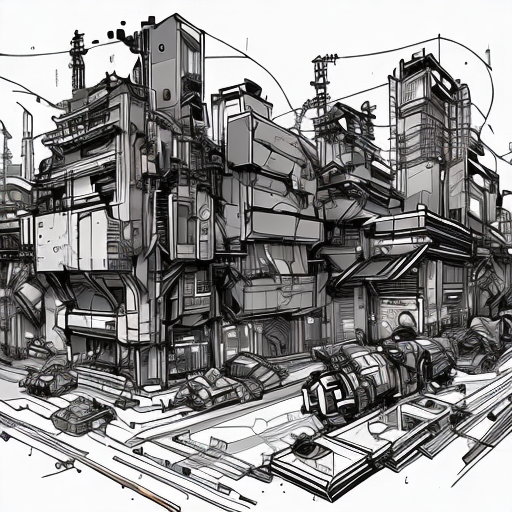

Images:  89%|████████▉ | 8/9 [00:25<00:03,  3.11s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Clockwork Keeper


The entire Clockwork Keeper is visible. Clockwork Keeper with intricate clockwork parts and glowing blue eyes on background of towering steel and copper skyscrapers during the evening with a fiery sunset. vinkpunk

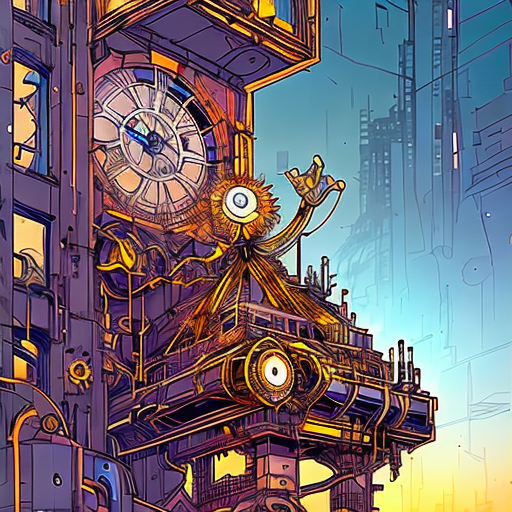

Images: 100%|██████████| 9/9 [00:28<00:00,  3.18s/it]


9

In [4]:
from holodeck.gpt_image import generate_image
from IPython.display import display, Markdown

img_prompts = locations_prompts + objects_image_prompts + buildings_image_prompts

img_prompts = img_prompts[:9]

images = []

for obj, prompt in tqdm(img_prompts, desc="Images"):
    image = generate_image(prompt)
    display(Markdown(f"### {obj.name}"))
    display(Markdown(prompt))
    display(image)
    image_file_name = f".images/{obj.name}.jpg"
    image.save(image_file_name)
    images.append((obj, prompt, image_file_name))

len(images)


## Display Images

In [5]:
import ipywidgets as widgets
from IPython.display import display
from concurrent.futures import ThreadPoolExecutor, as_completed
from functools import lru_cache
import PIL.Image as Image
import threading

# Define the grid layout
grid = widgets.GridBox(
    layout=widgets.Layout(
        grid_template_columns="repeat(4, 1fr)",
        grid_gap="10px"
    )
)

# Define a function to load an image
@lru_cache(maxsize=1000)
def load_image(img_path):
    with open(img_path, 'rb') as f:
        image = f.read()
    return image

# Define a function to create the widget for each tuple
def create_item_widget(obj, text, img_path):
    img_widget = widgets.Image(format="jpg", width=150, height=150)
    obj_widget = widgets.HTML(f'<h3 style="font-size: 9px; line-height: 1.0;">{obj.name}</h3>')
    text_widget = widgets.HTML(f'<p style="font-size: 8px; line-height: 1.0;">{text}</p>')
    item = widgets.VBox([img_widget, obj_widget, text_widget])

    # Load image asynchronously
    def load_image_async():
        image = load_image(img_path)
        img_widget.value = image
        item._dom_classes = tuple(set(item._dom_classes) | {'displayed'})

    # Listen for changes to the value attribute of the Image widget
    def on_image_value_changed(change):
        if change.new:
            threading.Thread(target=load_image_async).start()

    img_widget.observe(on_image_value_changed, names='value')

    return item

# Define a function to load the next batch of items
def load_next_items(start, end):
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = []
        for obj, text, img_path in images[start:end]:
            future = executor.submit(create_item_widget, obj, text, img_path)
            futures.append(future)

        # Add widgets to the grid as they are completed
        for future in as_completed(futures):
            item = future.result()
            grid.children += (item,)

# Load the first batch of items
load_next_items(0, 4)

# Define a function to load more items when the user scrolls to the bottom of the page
def on_scroll(change):
    scroll_position = change['new']
    if scroll_position >= (len(grid.children) - 5) * 150:
        load_next_items(len(grid.children), len(grid.children) + 20)

# Create an Output widget to monitor scroll events
out = widgets.Output()

# Attach the on_scroll function to the Output widget
with out:
    widgets.jslink((out, 'outputs'), (out, 'scrollTop'))
out.observe(on_scroll, names='outputs')

# Display the Output widget and the grid
display(out)
display(grid)


Output()

GridBox(children=(VBox(children=(Image(value=b'', format='jpg', height='150', width='150'), HTML(value='<h3 st…